# Integrative Task 3 

## Andrés Arango
## Jhonatan Castaño

#### Import of libraries for the project

In [2]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import tensorflow as tf
import keras 

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Andrés
[nltk_data]    |     Arango\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Andrés
[nltk_data]    |     Arango\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Andrés
[nltk_data]    |     Arango\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Andrés
[nltk_data]    |     Arango\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_da

#### Amazon database aggregation

In [3]:
df_amazon = pd.read_csv(r"sentiment labelled sentences\amazon_cells_labelled.txt",sep="\t",header=None,names=['sentence','target'])

In [4]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   target    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


#### Imbd database aggregation

In [5]:
df_imbd = pd.read_csv(r"sentiment labelled sentences\imdb.txt",sep="\t",header=None,names=['sentence','target'])


In [6]:
df_imbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  748 non-null    object
 1   target    748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


#### Imdb database aggregation

In [7]:
df_yelp = pd.read_csv(r"sentiment labelled sentences\yelp_labelled.txt",sep="\t",header=None,names=['sentence','target'])

In [8]:
df_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   target    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


#### Data from all the databases

Text(0.5, 1.0, 'Data from each of the databases')

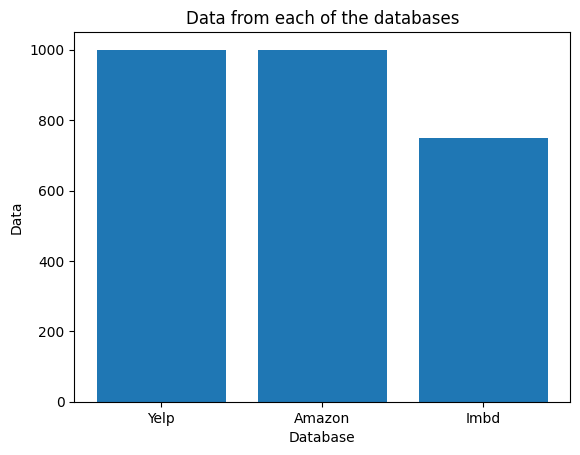

In [9]:

plt.bar(["Yelp","Amazon","Imbd"],[df_yelp.shape[0],df_amazon.shape[0],df_imbd.shape[0]])
plt.ylabel("Data")
plt.xlabel("Database")
plt.title("Data from each of the databases")

In [10]:
df_sub1 = df_amazon.append(df_imbd,ignore_index=True)
df= df_sub1.append(df_yelp,ignore_index=True)

#### Database for the project, has 2 columns and 2748 sentences all with a result between 0 and 1 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2748 non-null   object
 1   target    2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


#### Database display

In [12]:
df.head()

,sentence,target
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [13]:
df.describe()

,target
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


#### True and false classification

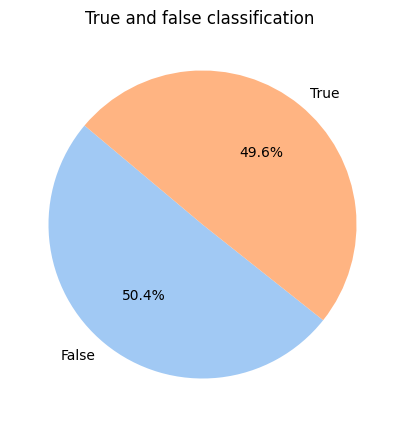

In [14]:
conteo =df["target"].value_counts()
plt.figure(figsize=(15,5))
plt.pie(conteo, labels=["False","True"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("True and false classification ")
plt.show()

#### Tokemnization of sentences, tokemnizes the words by dividing them into lists, converts all tokems to lower case, removes empty words, reduces words (becomes lemmas) and reconstructs sentences, returning them

In [15]:
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    processed_text = ' '.join(tokens)
    return processed_text

#### The tokemnization function is applied to the database. 

In [16]:
df['sentence'] = df['sentence'].apply(preprocess_text)

#### Database after tokemnization of the sentences 

In [17]:
df.head()

,sentence,target
0,way plug u unless go converter .,0
1,"good case , excellent value .",1
2,great jawbone .,1
3,tied charger conversation lasting 45 minutes.m...,0
4,mic great .,1


#### Division of the database into training and test sets

In [18]:

X = df['sentence']
y = df['target']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, train_size=0.8, shuffle=True)

#### Convert texts into numerical sequences and ensure that all sequences have the same length for the models. 

In [19]:
max_words = 10000
max_len = 50
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences_train = tok.texts_to_sequences(X_train)
sequences_test = tok.texts_to_sequences(X_test)
sequences_matrix_train = pad_sequences(sequences_train,maxlen=max_len)
sequences_matrix_test = pad_sequences(sequences_test,maxlen=max_len)

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
max_len = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

#### Graphing of token data

100%|██████████| 2748/2748 [00:00<00:00, 6589.44it/s]


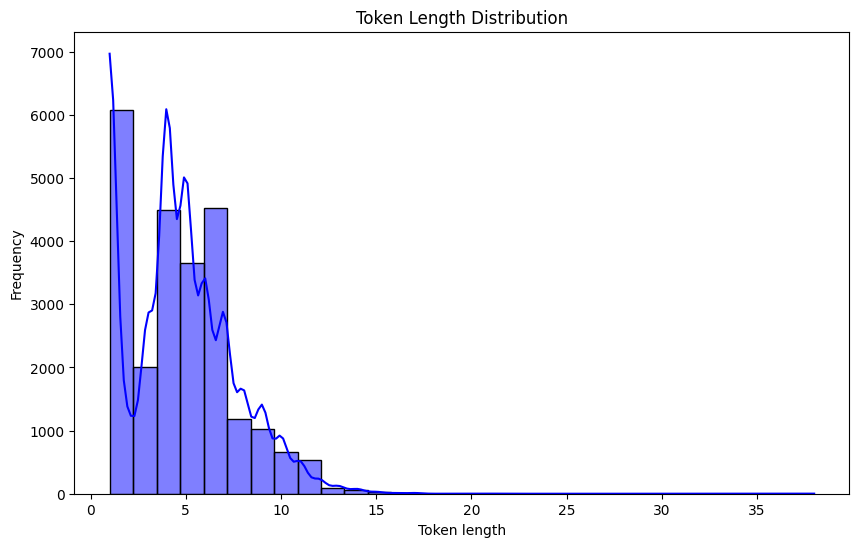

In [21]:
tokens = []
for text in tqdm(df['sentence']):
    tokens.extend(word_tokenize(text))

token_lengths = [len(token) for token in tokens]
token_df = pd.DataFrame({'Longitud del Token': token_lengths})

plt.figure(figsize=(10, 6))
sns.histplot(token_df['Longitud del Token'], bins=30, kde=True, color='blue')
plt.title('Token Length Distribution')
plt.xlabel('Token length')
plt.ylabel('Frequency')
plt.show()

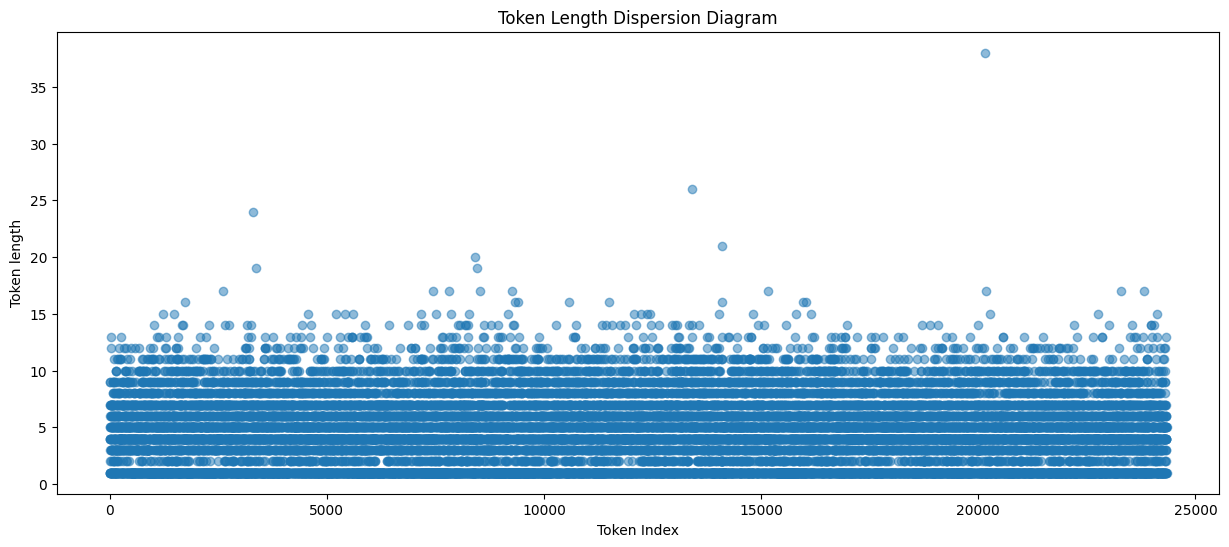

In [22]:
plt.figure(figsize=(15, 6))
plt.scatter(range(len(tokens)), token_lengths, alpha=0.5)
plt.title('Token Length Dispersion Diagram')
plt.xlabel('Token Index')
plt.ylabel('Token length')
plt.show()

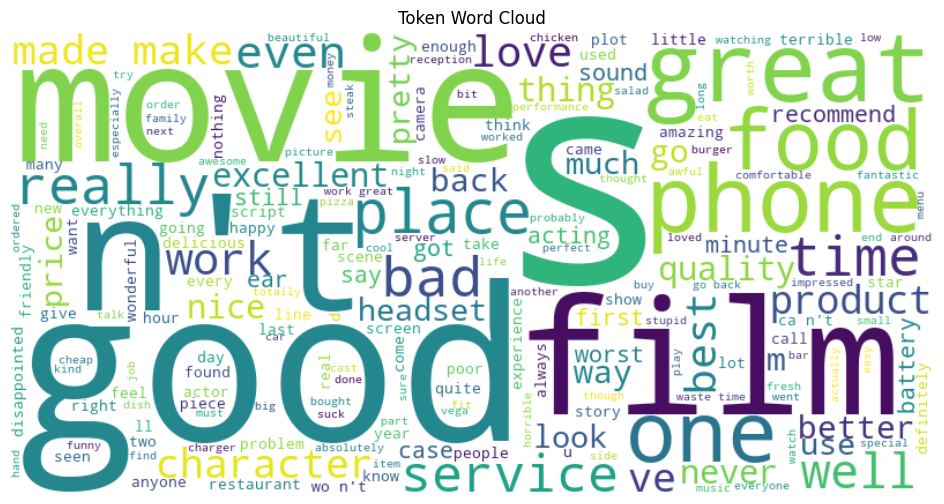

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Token Word Cloud')
plt.show()

#### Start of DumyClassifier implementation 

In [24]:
dummy_clf = DummyClassifier()
dummy_clf.fit(train_data, y_train)

DummyClassifier()

#### Results of the basic implementation of DummyClassifier

In [25]:
y_pred = dummy_clf.predict(test_data)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Exactitud: {accuracy:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recuperación: {recall:.2f}')
print(f'Puntuación F1: {f1:.2f}')

Exactitud: 0.47
Precisión: 0.22
Recuperación: 0.47
Puntuación F1: 0.30


Text(0.5, 1.0, 'Scores in DummyClassifier')

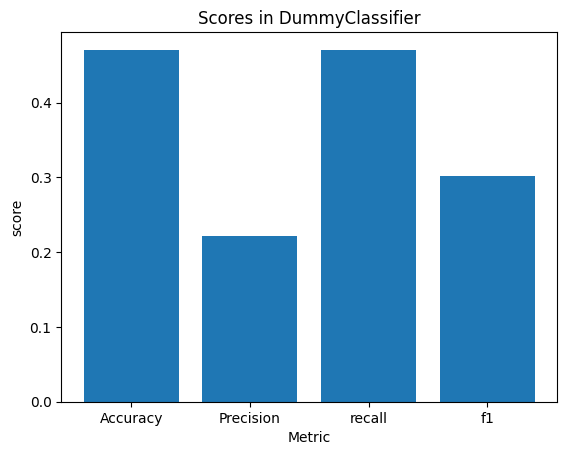

In [26]:
results = [accuracy,precision,recall,f1]
nombre= ["Accuracy","Precision","recall","f1"]
plt.bar(nombre,results)
plt.ylabel("score")
plt.xlabel("Metric")
plt.title("Scores in DummyClassifier")

#### Folders Division

In [27]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(sequences_matrix_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')

Fold:1, Train set: 1758, Test set:440
Fold:1, Train set: 1758, Test set:440
Fold:1, Train set: 1758, Test set:440
Fold:1, Train set: 1759, Test set:439
Fold:1, Train set: 1759, Test set:439


#### Hyperparameter setting for DummyClassifier

In [28]:
from sklearn.model_selection import GridSearchCV

dummy_clf = DummyClassifier()

param_grid = {
    'strategy': ['uniform', 'most_frequent', 'stratified', 'constant'],
    'constant': [0, 1, 2]  
}

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(dummy_clf, param_grid, cv=5, scoring=scoring_metrics, refit="accuracy")

grid_search.fit(sequences_matrix_train, y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")



Mejores hiperparámetros: {'constant': 0, 'strategy': 'most_frequent'}


#### Evaluation of the DummyClassifier model with improved hyperparameters and test data 

In [29]:
best_dummy = grid_search.best_estimator_
y_pred_best = best_dummy.predict(test_data)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f'Exactitud con mejores hiperparámetros: {accuracy_best:.2f}')
print(f'Precisión con mejores hiperparámetros: {precision_best:.2f}')
print(f'Recuperación con mejores hiperparámetros: {recall_best:.2f}')
print(f'Puntuación F1 con mejores hiperparámetros: {f1_best:.2f}')

Exactitud con mejores hiperparámetros: 0.47
Precisión con mejores hiperparámetros: 0.22
Recuperación con mejores hiperparámetros: 0.47
Puntuación F1 con mejores hiperparámetros: 0.30


#### Cross-validation results with hyperparameter adjustment 

Scores for each fold are: [0.46363636 0.53636364 0.42727273 0.44545455 0.50909091]
Average score: 0.48


Text(0.5, 1.0, 'Scores for cross validation in Dummy Classifier')

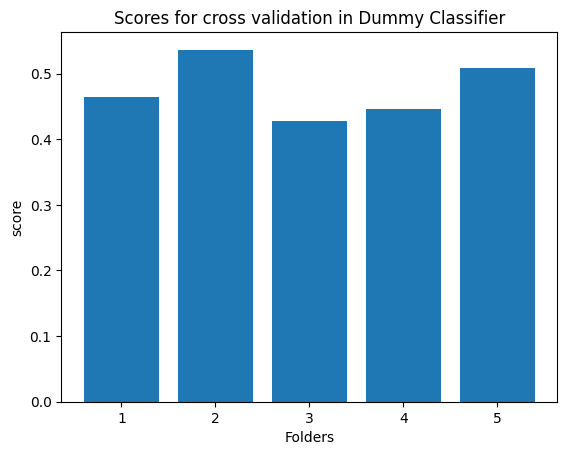

In [30]:
score = cross_val_score(DummyClassifier(constant=0, strategy='uniform'), sequences_matrix_test, y_test, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
plt.bar([1,2,3,4,5],[score[0],score[1],score[2],score[3],score[4]])
plt.ylabel("score")
plt.xlabel("Folders")
plt.title("Scores for cross validation in Dummy Classifier")

#### Cross-Validation vs Training Results

<Axes: title={'center': 'DummyClassifier Test Score vs CrossValidationscore'}, xlabel='Training examples', ylabel='Score'>

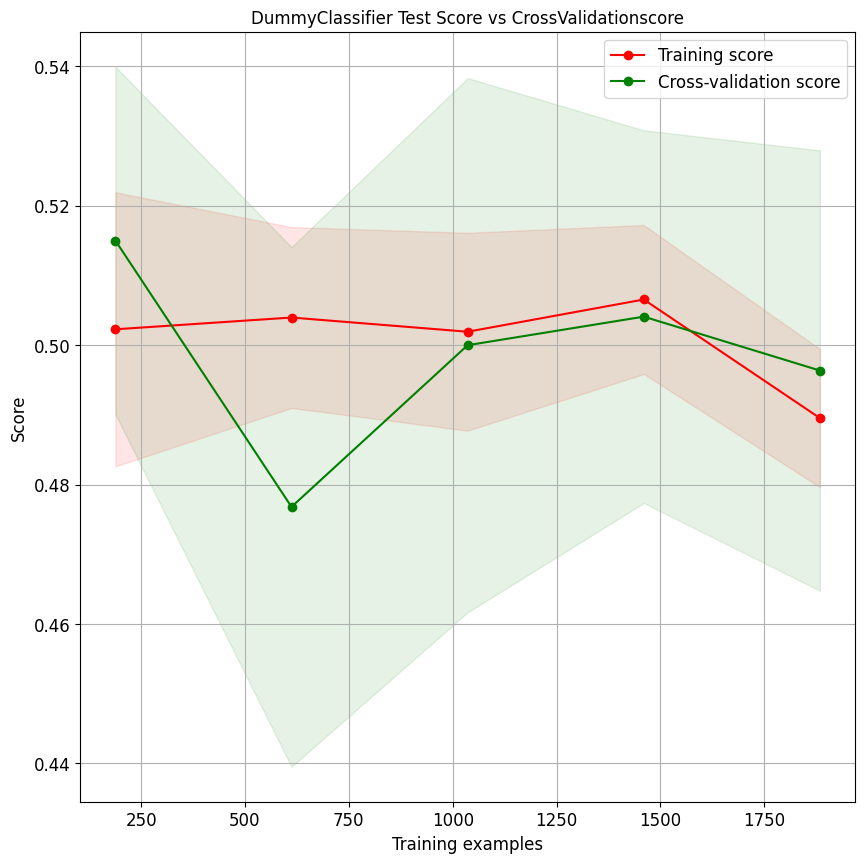

In [31]:
skplt.estimators.plot_learning_curve(DummyClassifier(constant=0, strategy='uniform'), train_data, y_train,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(10,10), title_fontsize="large", text_fontsize="large",
                                     title="DummyClassifier Test Score vs CrossValidationscore")

#### DummyClassifier model confusion matrix with hyperparameter adjustment 

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

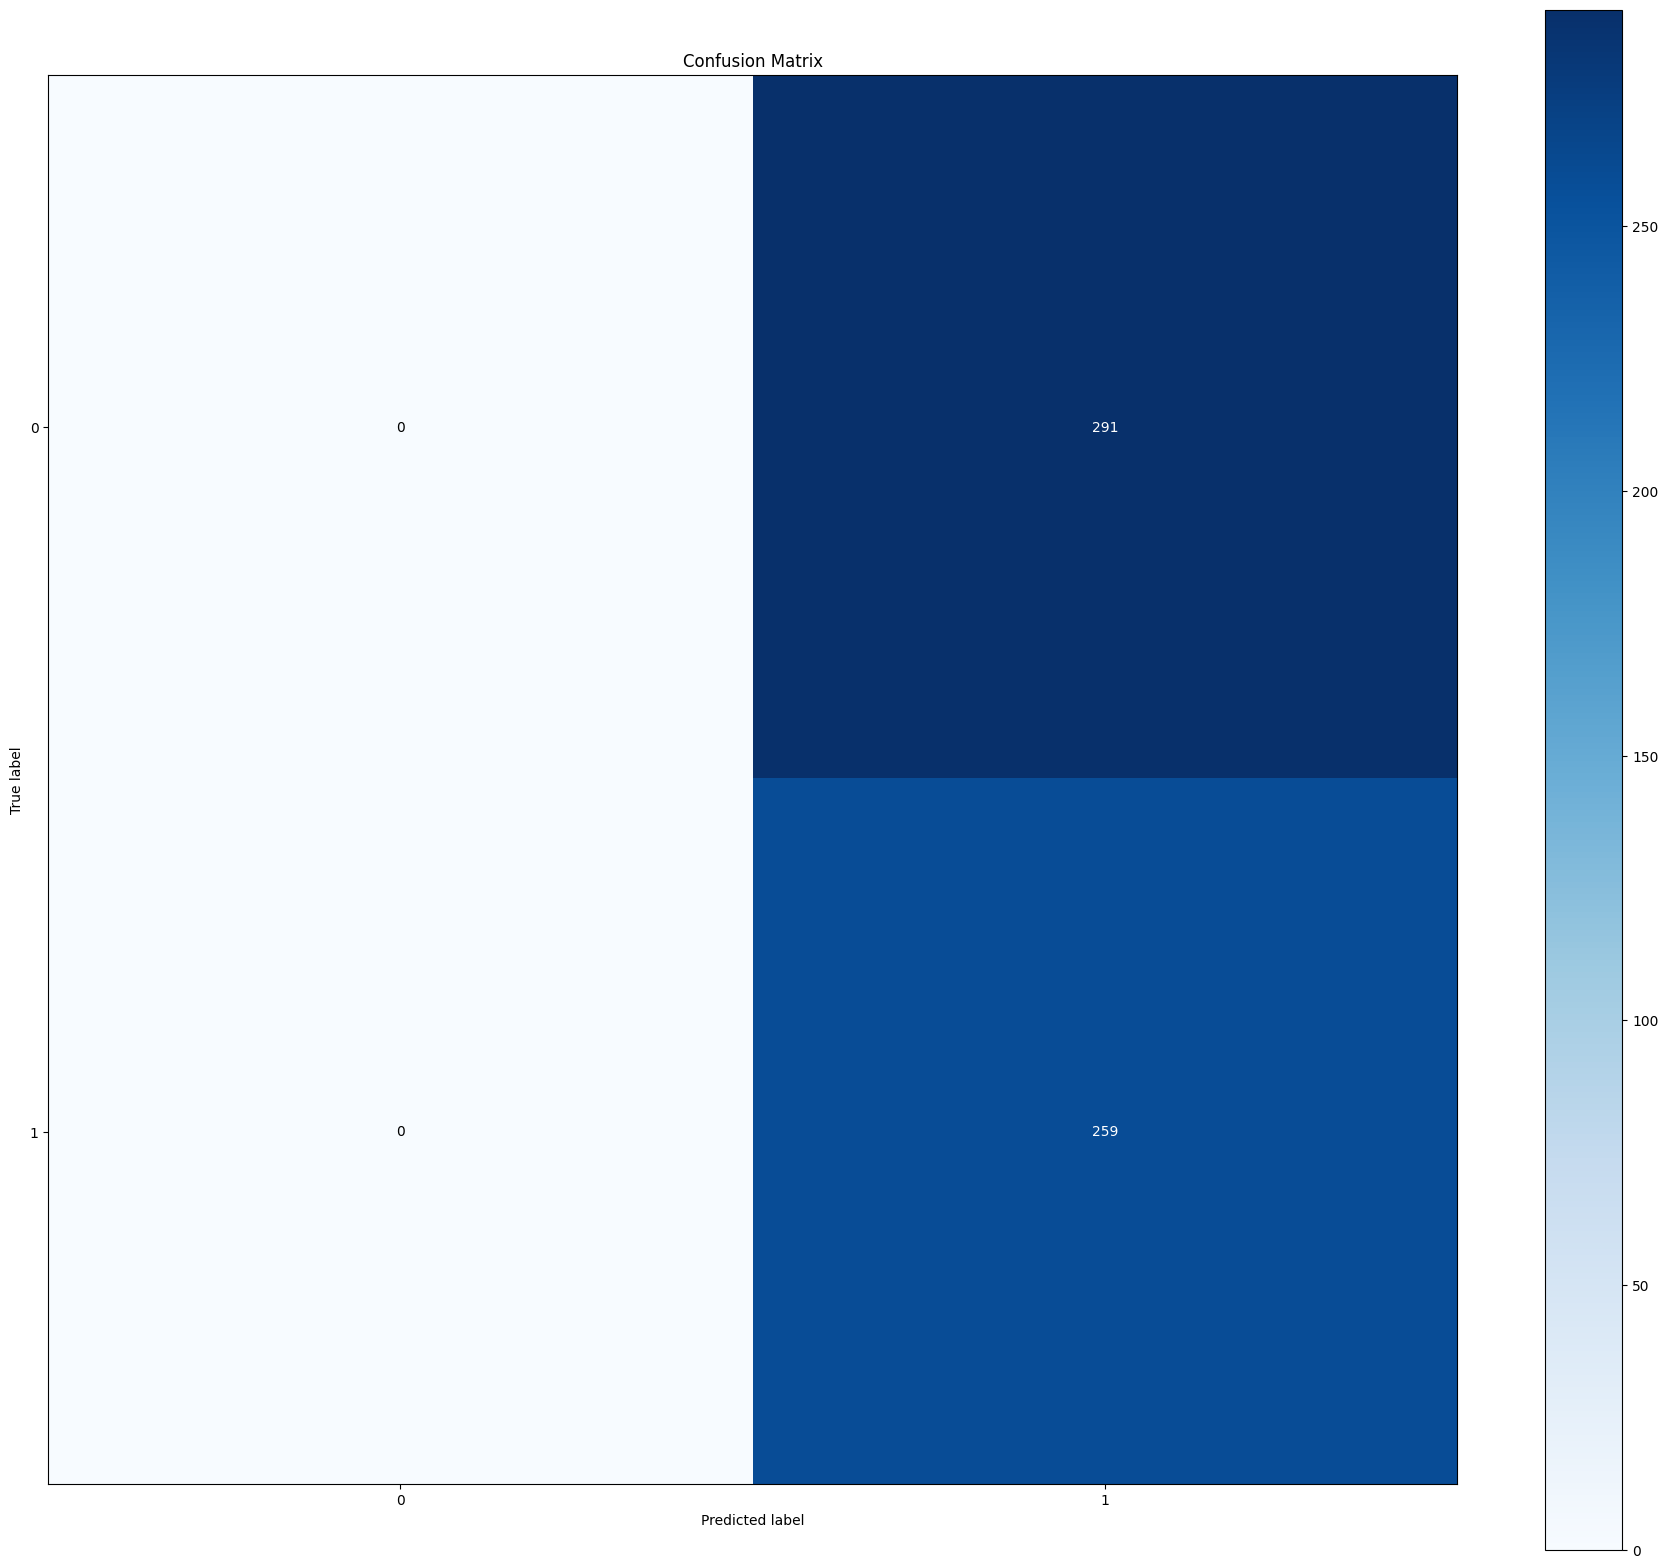

In [32]:
fig = plt.figure(figsize=(50,20))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_best,
                                    title="Confusion Matrix",
                                    cmap="Blues",
                                    ax=ax1)

#### ROC curve of DummyClassifier

<Axes: title={'center': 'Digits ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

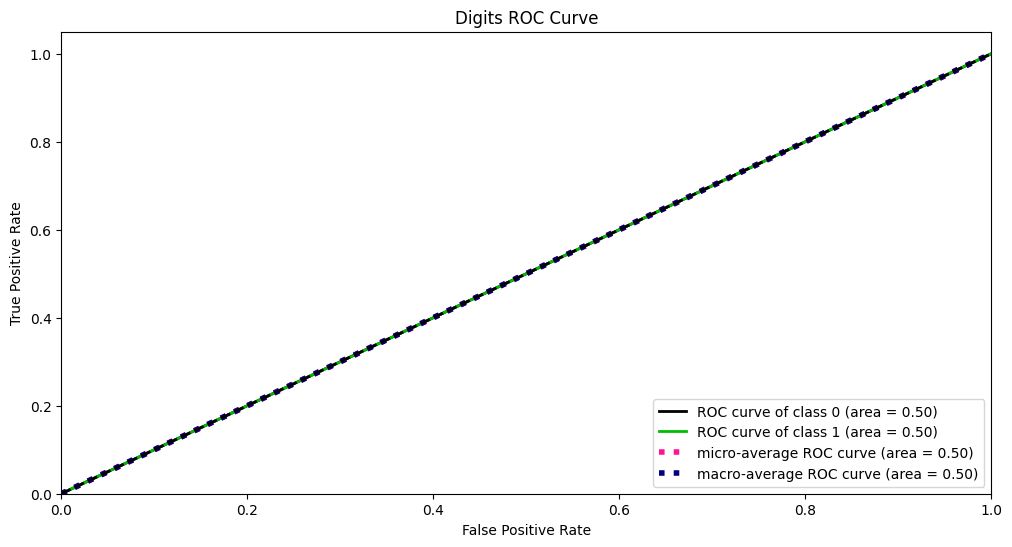

In [33]:
dummy =DummyClassifier(constant=0, strategy='uniform')
dummy.fit(train_data,y_train)
Y_pred = dummy.predict_proba(sequences_matrix_test)
skplt.metrics.plot_roc_curve(y_test,Y_pred,
                       title="Digits ROC Curve", figsize=(12,6))

### RNN Model
#### Creation of the model

In [34]:
def create_rnn_model(units=32):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_len))
    model.add(SimpleRNN(units=units, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

    

#### Initialization of the variable that will have the model

In [35]:
rnn_model = create_rnn_model()

#### Summary of the RNN model

In [36]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 816, 32)           133440    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 135,553
Trainable params: 135,553
Non-trainable params: 0
_________________________________________________________________


#### First attempt at model training

In [37]:
history = rnn_model.fit(train_data, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
28/28 [==============================] - 9s 222ms/step - loss: 0.6923 - accuracy: 0.5301 - val_loss: 0.6919 - val_accuracy: 0.5477
Epoch 2/5
28/28 [==============================] - 5s 186ms/step - loss: 0.6693 - accuracy: 0.7992 - val_loss: 0.6813 - val_accuracy: 0.6000
Epoch 3/5
28/28 [==============================] - 5s 182ms/step - loss: 0.5887 - accuracy: 0.8697 - val_loss: 0.6124 - val_accuracy: 0.7205
Epoch 4/5
28/28 [==============================] - 5s 182ms/step - loss: 0.5426 - accuracy: 0.8635 - val_loss: 0.6024 - val_accuracy: 0.6818
Epoch 5/5
28/28 [==============================] - 5s 180ms/step - loss: 0.3895 - accuracy: 0.9181 - val_loss: 0.5857 - val_accuracy: 0.7000


#### Model results in graphs 

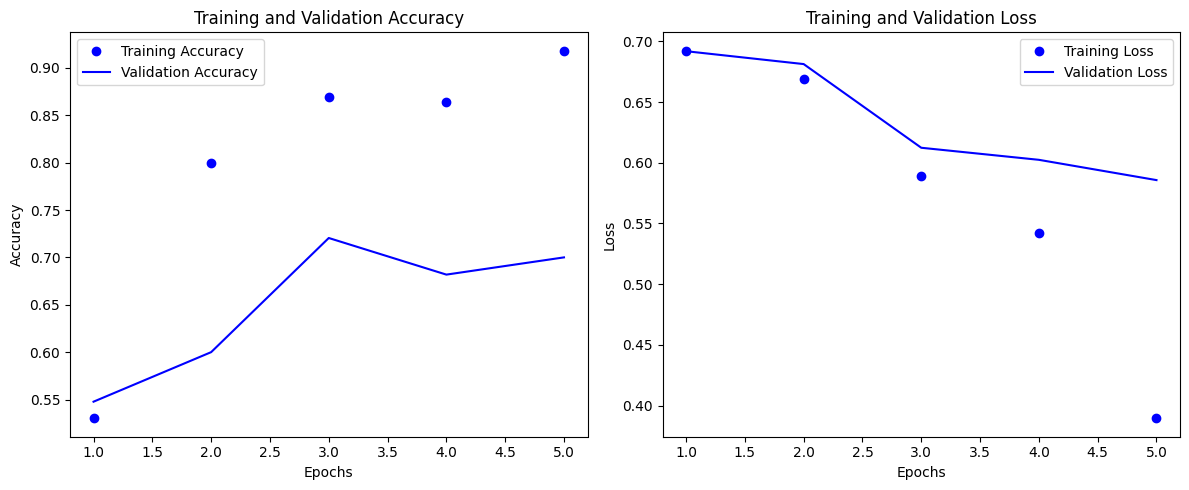

In [38]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Reassignment of the model to a variable for the search of the best hyperparameters 

In [39]:
rnn_model = KerasClassifier(build_fn=create_rnn_model, epochs=5, batch_size=32, verbose=0)


#### Hyperparameter adjustment 

In [40]:
param_grid = {
    'units': [50, 100],
    'epochs': [5, 10],
    'batch_size': [32, 64]
}

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(rnn_model, param_grid, cv=3, scoring=scoring_metrics,refit='accuracy',n_jobs=-1)

# Realizar la búsqueda en los datos de entrenamiento
grid_search.fit(train_data,y_train)

# Imprimir los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'batch_size': 32, 'epochs': 10, 'units': 50}


#### Assignment of model to parameter

In [58]:
best_model = grid_search.best_estimator_

#### Results of cross validation

4/4 [==============================] - 1s 51ms/step
Scores for each fold are: [0.59090909 0.63636364 0.66363636 0.64545455 0.60909091]
Average score: 0.63


Text(0.5, 1.0, 'Scores for cross validation in RNN')

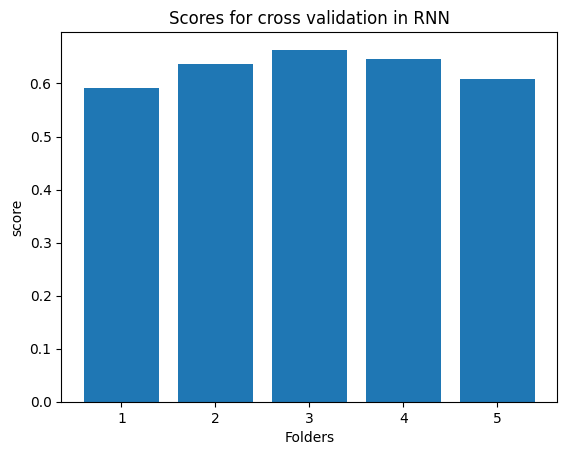

In [42]:
score = cross_val_score(best_model, test_data, y_test, cv= 5, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
plt.bar([1,2,3,4,5],[score[0],score[1],score[2],score[3],score[4]])
plt.ylabel("score")
plt.xlabel("Folders")
plt.title("Scores for cross validation in RNN")

#### Cross Validation vs Training 

<Axes: title={'center': 'RNN train Score vs CrossValidationscore'}, xlabel='Training examples', ylabel='Score'>

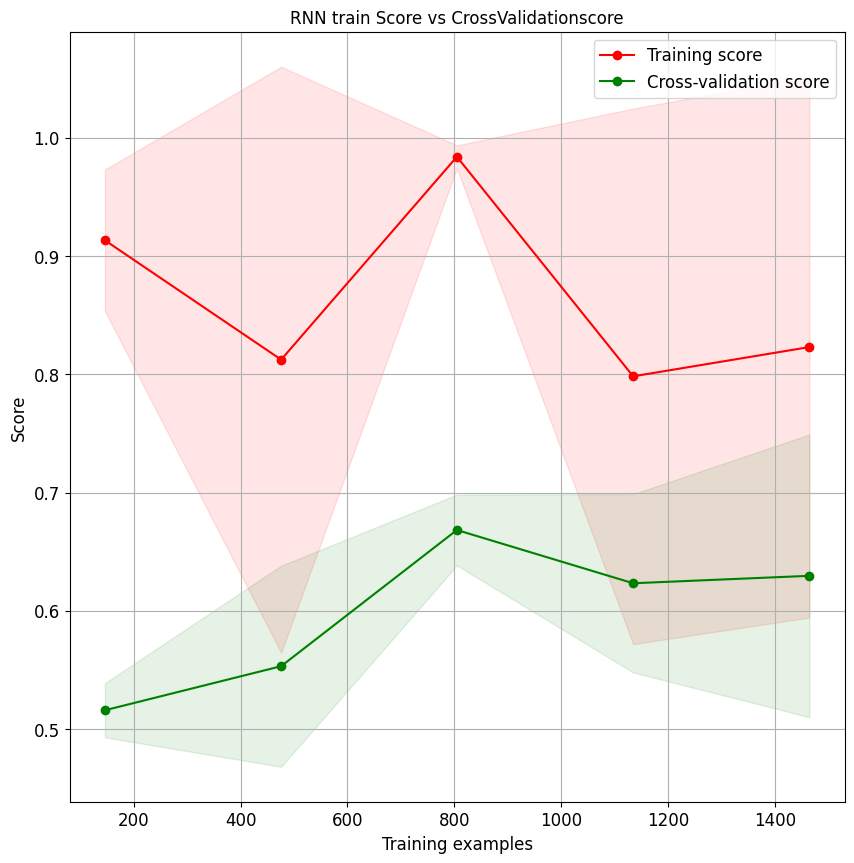

In [43]:
skplt.estimators.plot_learning_curve(best_model, train_data, y_train,
                                     cv=3, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(10,10), title_fontsize="large", text_fontsize="large",
                                     title="RNN train Score vs CrossValidationscore")

#### Results of the best estimators in the test data

In [61]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_data)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprime los resultados con los mejores hiperparámetros
print(f'Exactitud con mejores hiperparámetros: {accuracy:.2f}')
print(f'Precisión con mejores hiperparámetros: {precision:.2f}')
print(f'Recuperación con mejores hiperparámetros: {recall:.2f}')
print(f'Puntuación F1 con mejores hiperparámetros: {f1:.2f}')

18/18 [==============================] - 1s 43ms/step
Exactitud con mejores hiperparámetros: 0.79
Precisión con mejores hiperparámetros: 0.74
Recuperación con mejores hiperparámetros: 0.83
Puntuación F1 con mejores hiperparámetros: 0.78


#### Confussion Matrix

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

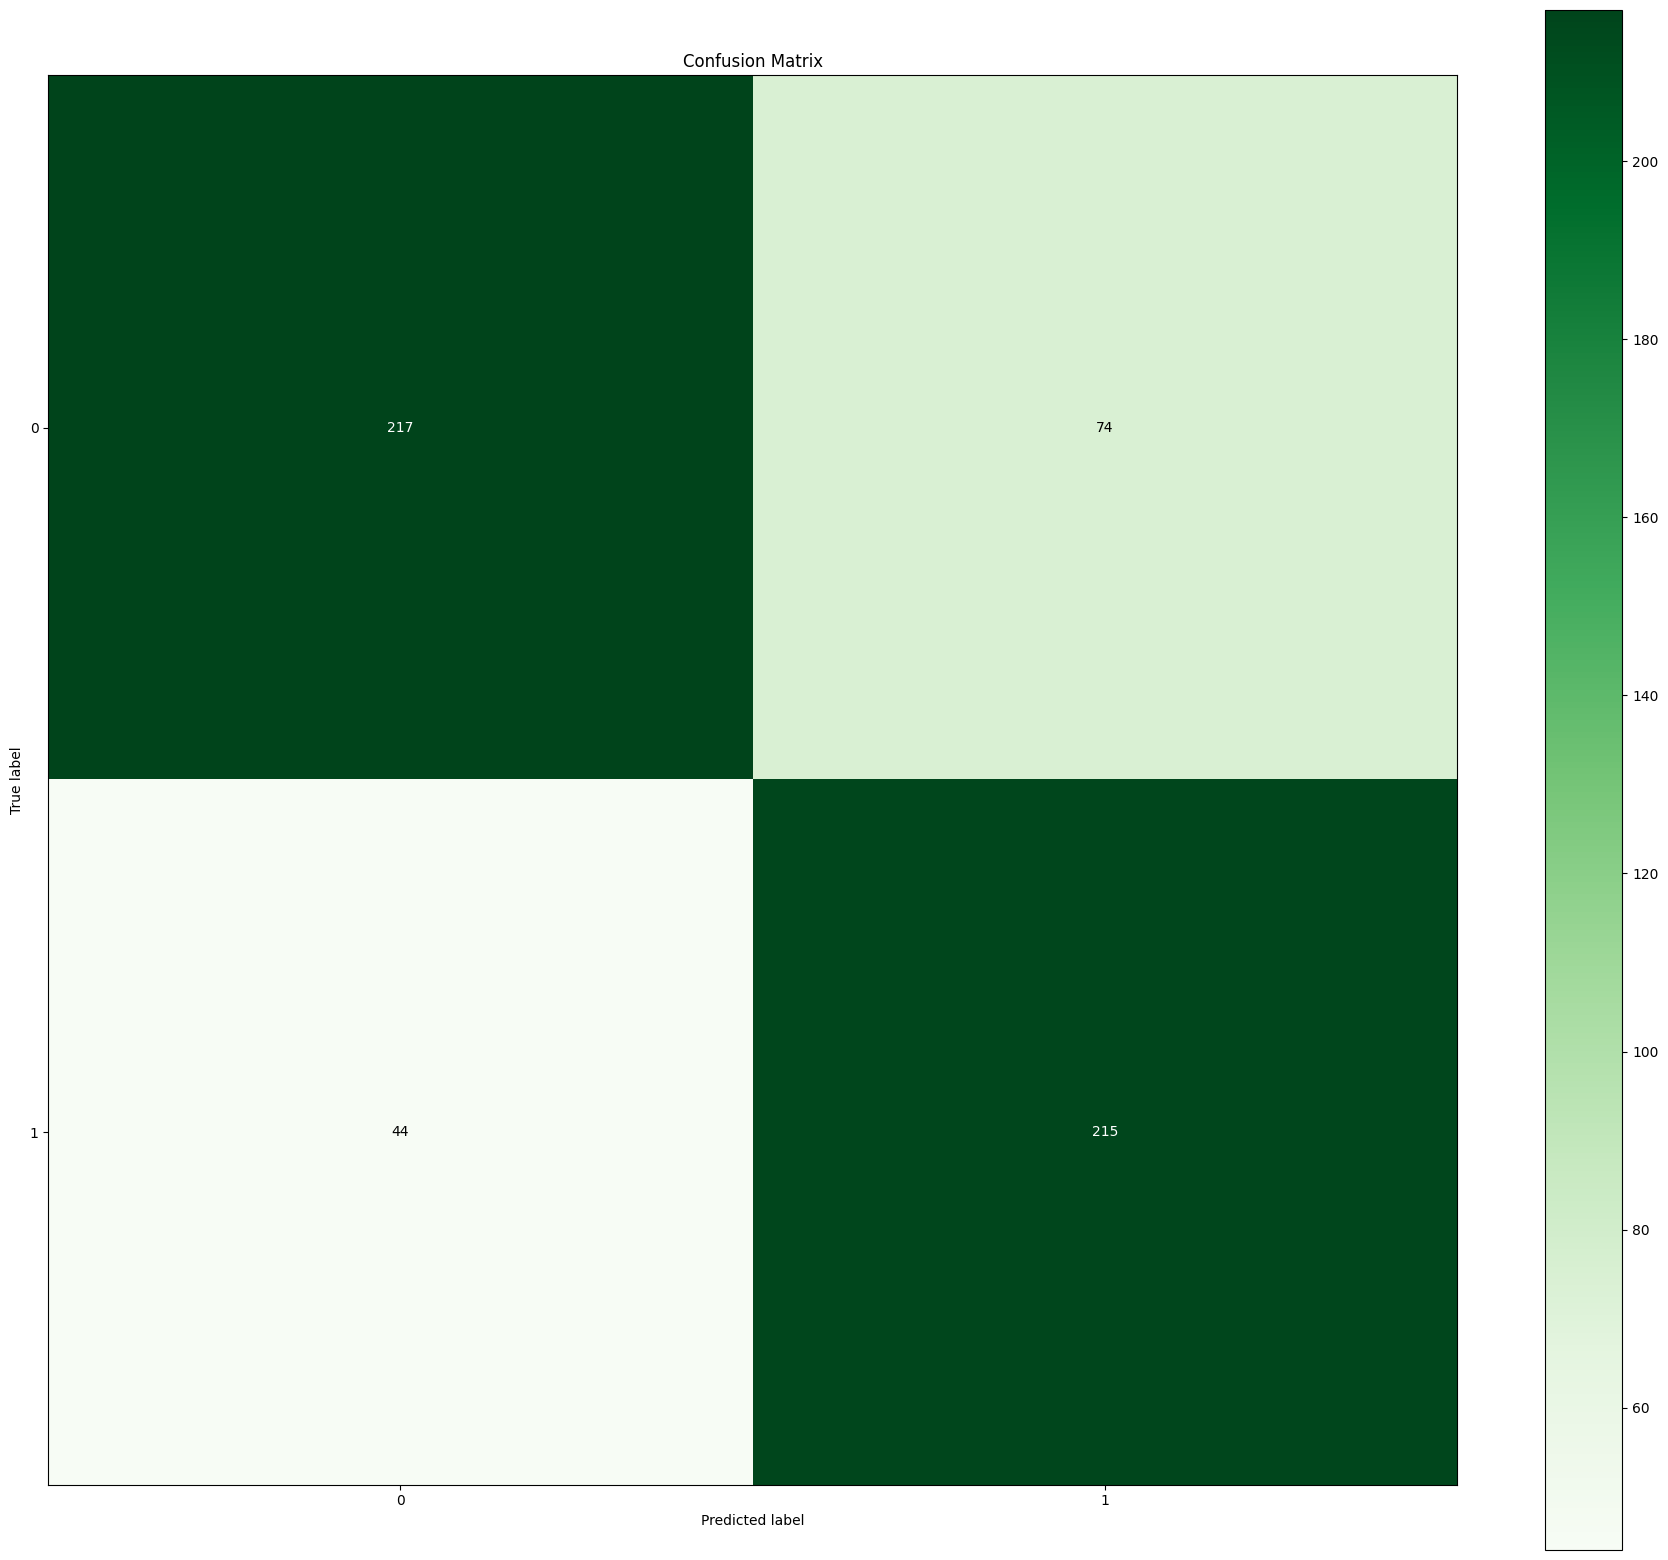

In [62]:
fig = plt.figure(figsize=(50,20))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Confusion Matrix",
                                    cmap="Greens",
                                    ax=ax1)

#### ROC Curve

18/18 [==============================] - 1s 41ms/step


<Axes: title={'center': 'Digits ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

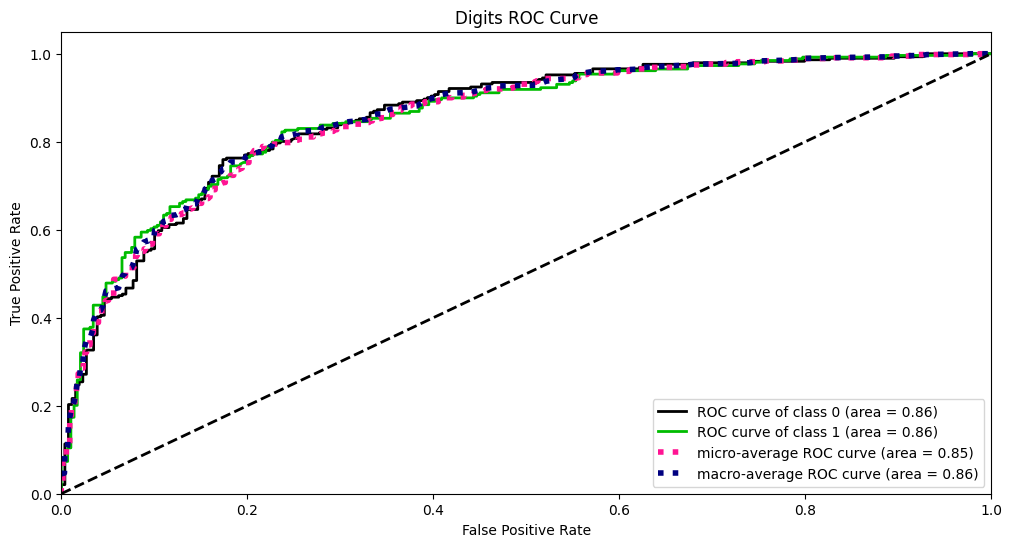

In [60]:
best_model.fit(train_data,y_train)
Y_pred = best_model.predict_proba(test_data)
skplt.metrics.plot_roc_curve(y_test,Y_pred,
                       title="Digits ROC Curve", figsize=(12,6))

#### Results of performance parameters

Text(0.5, 1.0, 'Scores for cross validation in RNN')

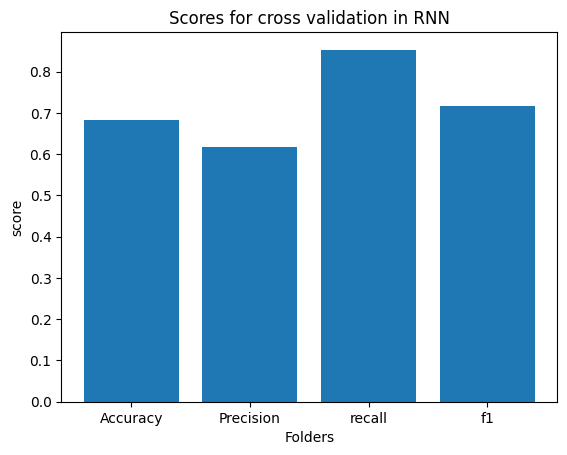

In [ ]:
results = [accuracy,precision,recall,f1]
nombre= ["Accuracy","Precision","recall","f1"]
plt.bar(nombre,results)
plt.ylabel("score")
plt.xlabel("Folders")
plt.title("Scores for cross validation in RNN")

### LSTM

#### Creation of the model

In [63]:
def create_lstm_model(units=50, input_shape=(max_len,)):
    model = Sequential()
    model.add(Embedding(max_words,16, input_length=max_len))
    model.add(LSTM(units=units, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(LSTM(units=units))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [64]:
lstm_model= create_lstm_model()
lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 816, 16)           160000    
                                                                 
 lstm (LSTM)                 (None, 816, 50)           13400     
                                                                 
 dropout (Dropout)           (None, 816, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 408       
                                                                 
 dense_10 (Dense)            (None, 1)                

#### Training the model

In [65]:
history=lstm_model.fit(train_data, y_train, epochs=5, batch_size=64, validation_data=(test_data,y_test))

Epoch 1/5


35/35 [==============================] - 47s 1s/step - loss: 0.9094 - accuracy: 0.5146 - val_loss: 0.8405 - val_accuracy: 0.4709
Epoch 2/5
35/35 [==============================] - 36s 1s/step - loss: 0.7957 - accuracy: 0.5177 - val_loss: 0.7613 - val_accuracy: 0.4727
Epoch 3/5
35/35 [==============================] - 38s 1s/step - loss: 0.6870 - accuracy: 0.6274 - val_loss: 0.6825 - val_accuracy: 0.7291
Epoch 4/5
35/35 [==============================] - 51s 1s/step - loss: 0.5417 - accuracy: 0.8267 - val_loss: 0.6516 - val_accuracy: 0.6964
Epoch 5/5
35/35 [==============================] - 47s 1s/step - loss: 0.4149 - accuracy: 0.9008 - val_loss: 0.5682 - val_accuracy: 0.7836


#### Results of this trained model

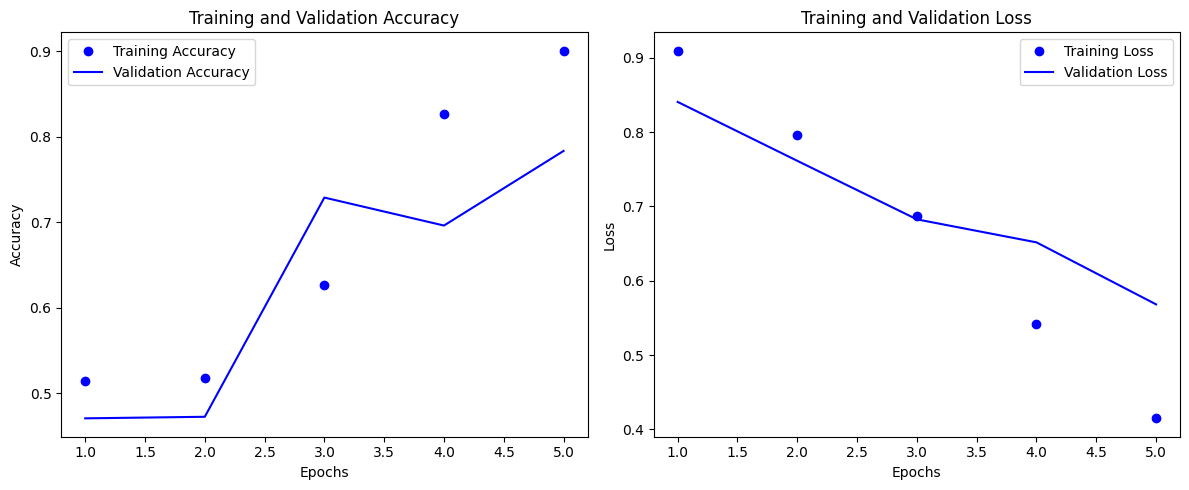

In [66]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [67]:
lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=2, batch_size=64, verbose=0)

#### Hyperparameter Tunning 

In [68]:
param_grid = {
    'epochs': [2, 4],
    'batch_size': [32, 64]
}

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

grid_search_lstm = GridSearchCV(lstm_model, param_grid, cv=2, scoring=scoring_metrics, refit='accuracy',n_jobs=-1)

# Realizar la búsqueda en los datos de entrenamiento
grid_search_lstm.fit(train_data,y_train)

# Imprimir los mejores hiperparámetros
best_params_lstm = grid_search_lstm.best_params_
print(f"Mejores hiperparámetros: {best_params_lstm}")

Mejores hiperparámetros: {'batch_size': 32, 'epochs': 4}


In [69]:
best_model_lstm = grid_search_lstm.best_estimator_

#### Results of cross validation

9/9 [==============================] - 3s 192ms/step
Scores for each fold are: [0.55272727 0.50545455]
Average score: 0.53


Text(0.5, 1.0, 'Scores for cross validation in LSTM')

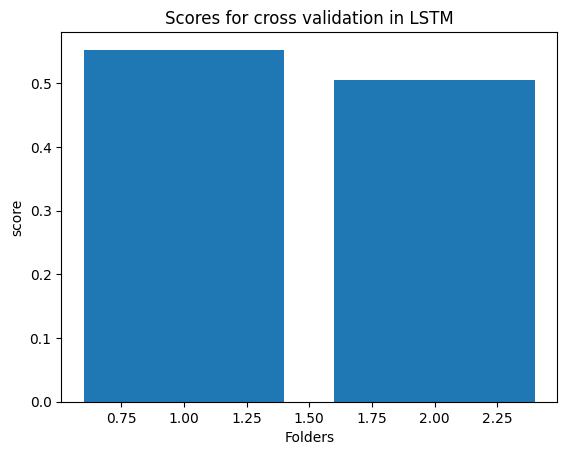

In [71]:
score = cross_val_score(best_model_lstm, test_data, y_test, cv= 2, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
plt.bar([1,2],[score[0],score[1]])
plt.ylabel("score")
plt.xlabel("Folders")
plt.title("Scores for cross validation in LSTM")

#### Cross validation vs Training

<Axes: title={'center': 'LSTM train Score vs CrossValidationscore'}, xlabel='Training examples', ylabel='Score'>

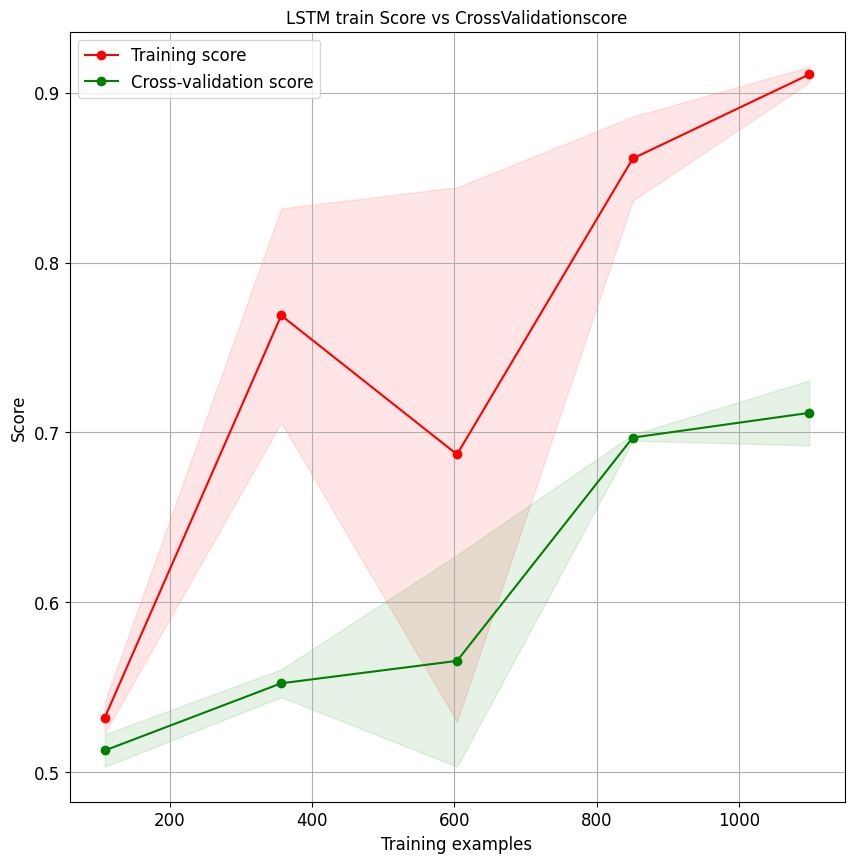

In [72]:
skplt.estimators.plot_learning_curve(best_model_lstm, train_data, y_train,
                                     cv=2, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(10,10), title_fontsize="large", text_fontsize="large",
                                     title="LSTM train Score vs CrossValidationscore")

#### Results of the best estimators in the test data

In [74]:
best_model_lstm = grid_search_lstm.best_estimator_
y_pred_lstm = best_model_lstm.predict(test_data)

accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test,y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)

# Imprime los resultados con los mejores hiperparámetros
print(f'Exactitud con mejores hiperparámetros: {accuracy_lstm:.2f}')
print(f'Precisión con mejores hiperparámetros: {precision_lstm:.2f}')
print(f'Recuperación con mejores hiperparámetros: {recall_lstm:.2f}')
print(f'Puntuación F1 con mejores hiperparámetros: {f1_lstm:.2f}')

18/18 [==============================] - 4s 224ms/step
Exactitud con mejores hiperparámetros: 0.80
Precisión con mejores hiperparámetros: 0.84
Recuperación con mejores hiperparámetros: 0.71
Puntuación F1 con mejores hiperparámetros: 0.77


#### Confussion Matrix

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

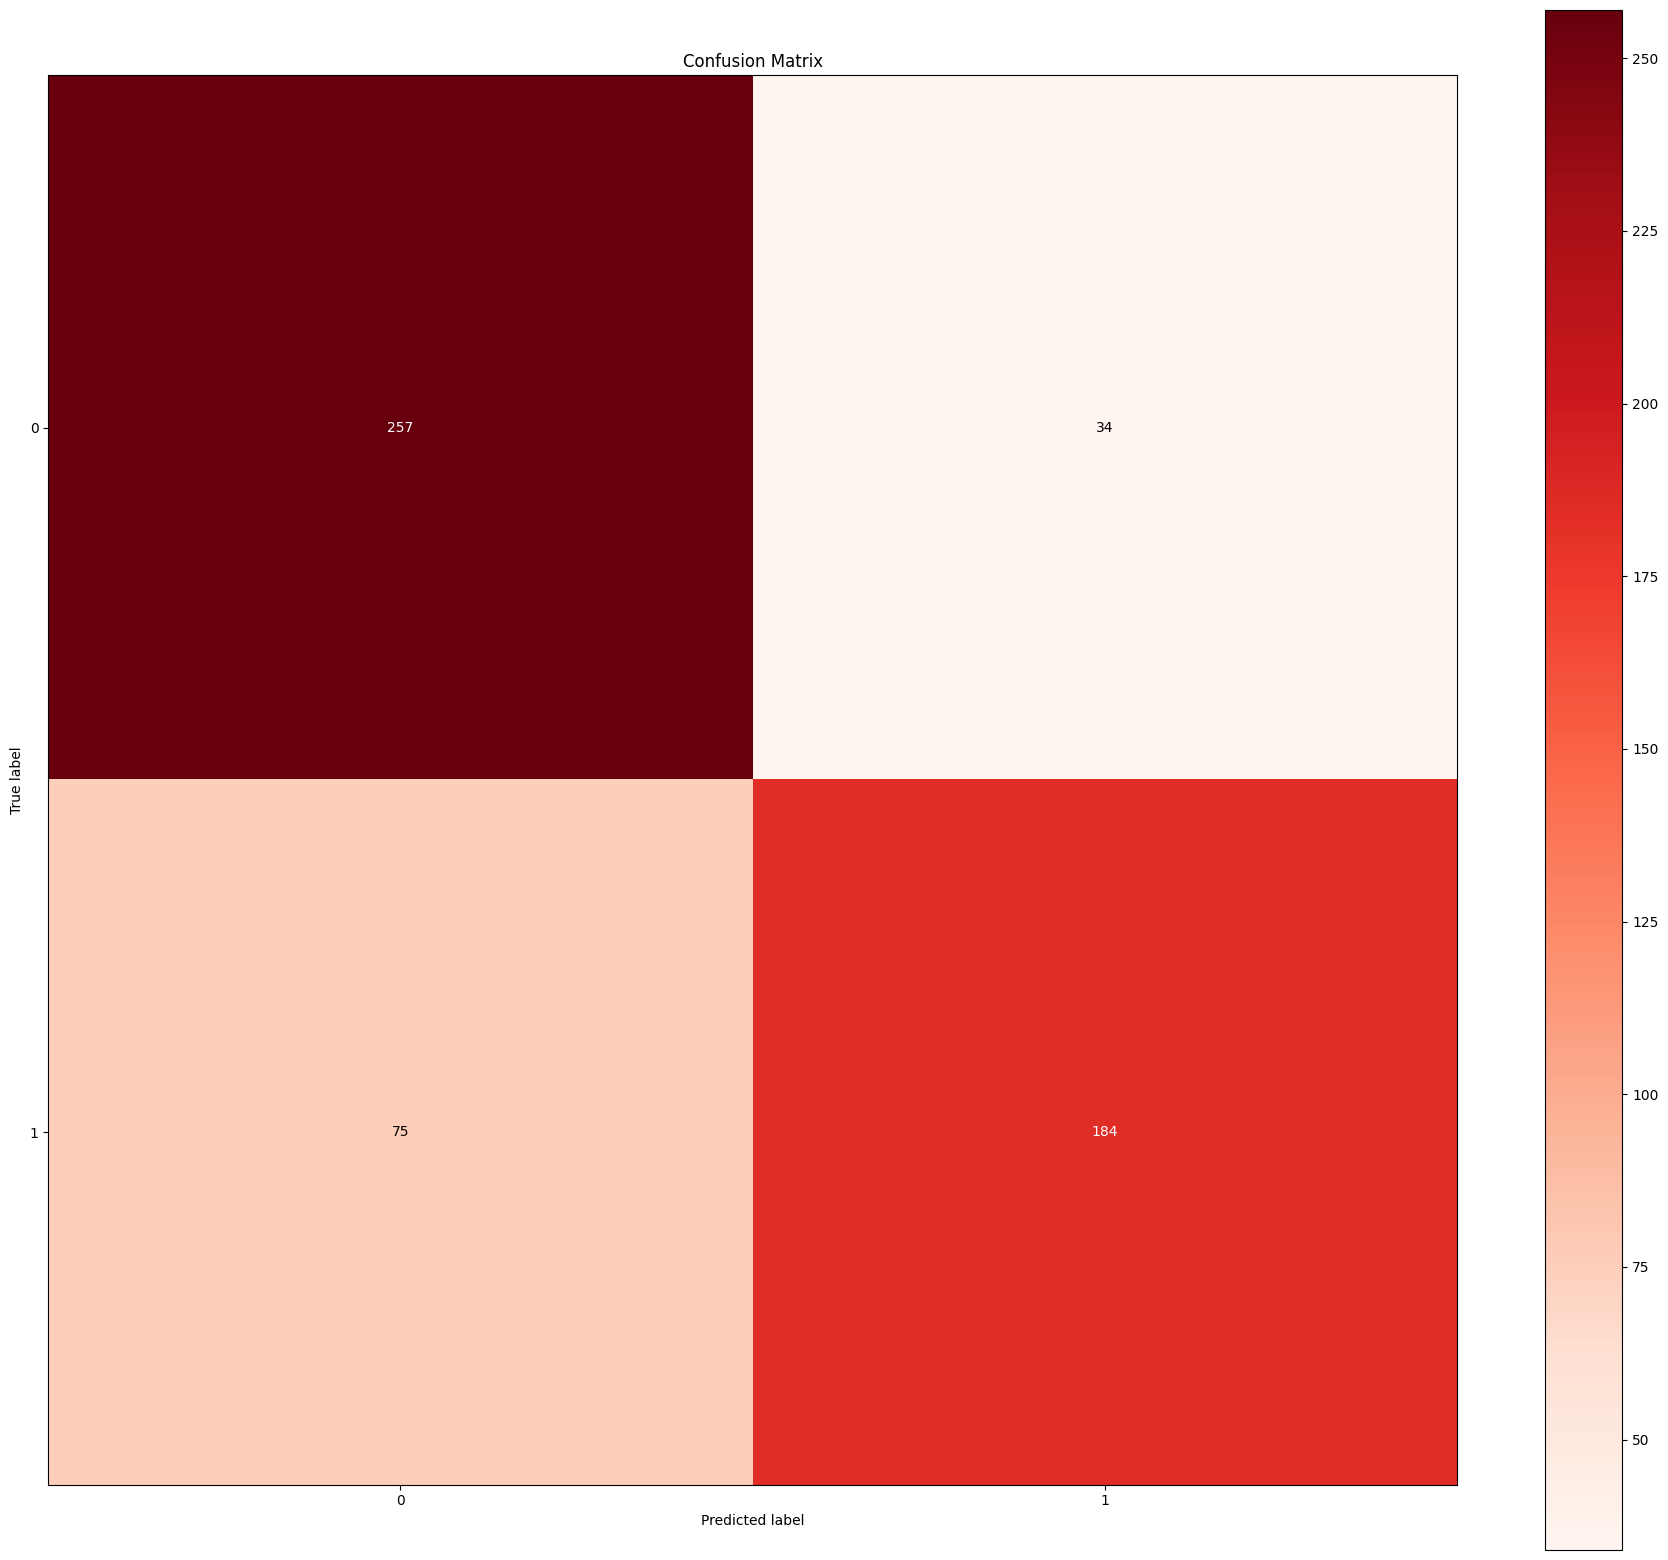

In [78]:
fig = plt.figure(figsize=(50,20))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lstm,
                                    title="Confusion Matrix",
                                    cmap="Reds",
                                    ax=ax1)

#### ROC Curve

18/18 [==============================] - 1s 42ms/step


<Axes: title={'center': 'Digits ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

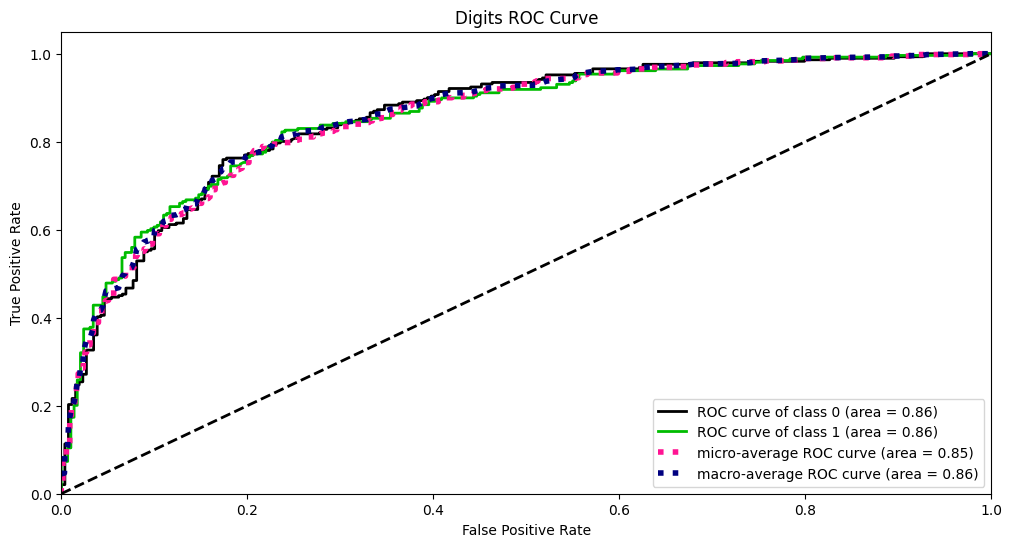

In [76]:
best_model_lstm.fit(train_data,y_train)
Y_pred_lsmt = best_model.predict_proba(test_data)
skplt.metrics.plot_roc_curve(y_test,Y_pred_lsmt,
                       title="Digits ROC Curve", figsize=(12,6))

####  Results of performance parameters

Text(0.5, 1.0, 'Scores for cross validation in LSTM')

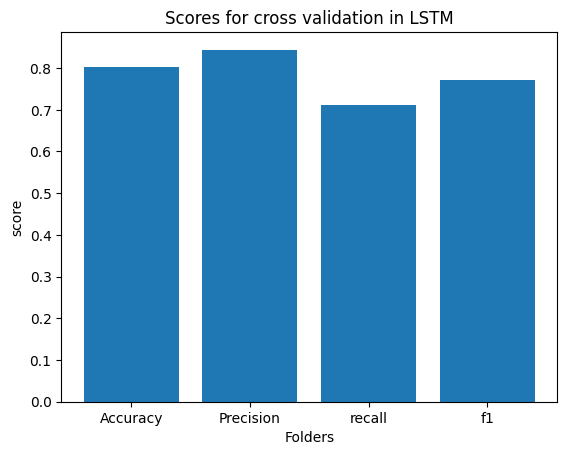

In [77]:
results = [accuracy_lstm,precision_lstm,recall_lstm,f1_lstm]
nombre= ["Accuracy","Precision","recall","f1"]
plt.bar(nombre,results)
plt.ylabel("score")
plt.xlabel("Folders")
plt.title("Scores for cross validation in LSTM")